The crime_data file information of crimes in cities. 

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

No need to balance as this is a clustering problem

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
encoder.fit(df['Unnamed: 0'])

LabelEncoder()

In [8]:
df['Unnamed: 0'] = encoder.transform(df['Unnamed: 0'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int32  
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.9 KB


In [10]:
df.corr()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,1.000000,-0.214458,-0.307237,-0.169887,-0.305142
Murder,-0.214458,1.000000,0.801873,0.069573,0.563579
Assault,-0.307237,0.801873,1.000000,0.258872,0.665241
UrbanPop,-0.169887,0.069573,0.258872,1.000000,0.411341
Rape,-0.305142,0.563579,0.665241,0.411341,1.000000


<Axes: >

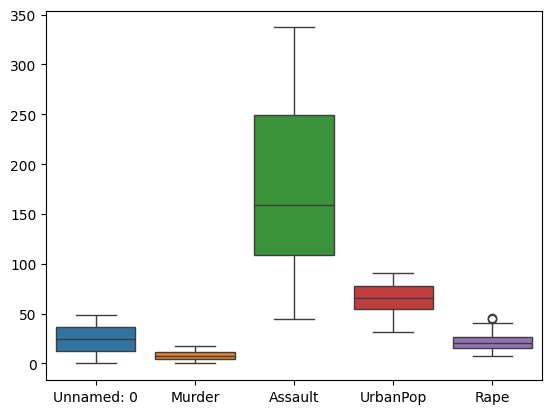

In [11]:
sns.boxplot(df)

In [12]:
from sklearn.preprocessing import StandardScaler

#create an object of standard scaler
scaler = StandardScaler()

#fit the data inot the scaler object
# fit mehthod requires a 2d collection (DF)
scaler.fit(df)

StandardScaler()

In [13]:
array_scaled = scaler.transform(df)
array_scaled

array([[-1.69774938,  1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [-1.62845348,  0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [-1.55915759,  0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [-1.4898617 ,  0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [-1.4205658 ,  0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [-1.35126991,  0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.28197402, -1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-1.21267813, -0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [-1.14338223,  1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [-1.07408634,  2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-1.00479045, -0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-0.93549455, -1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [-0.86619866,  0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.79690277, -0.13637203, -0.7

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int32  
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.9 KB


In [15]:
df_scaled = pd.DataFrame(array_scaled, columns=["Unnamed: 0", "Murder","Assault","UrbanPop","Rape"])
df_scaled

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,-1.697749,1.255179,0.790787,-0.526195,-0.003451
1,-1.628453,0.513019,1.118060,-1.224067,2.509424
2,-1.559158,0.072361,1.493817,1.009122,1.053466
3,-1.489862,0.234708,0.233212,-1.084492,-0.186794
4,-1.420566,0.281093,1.275635,1.776781,2.088814
5,-1.351270,0.025976,0.402909,0.869548,1.883901
6,-1.281974,-1.040880,-0.736484,0.799761,-1.092723
7,-1.212678,-0.437875,0.815030,0.450825,-0.585834
8,-1.143382,1.765415,1.990786,1.009122,1.150530
9,-1.074086,2.229265,0.487757,-0.386621,0.492653


<Axes: >

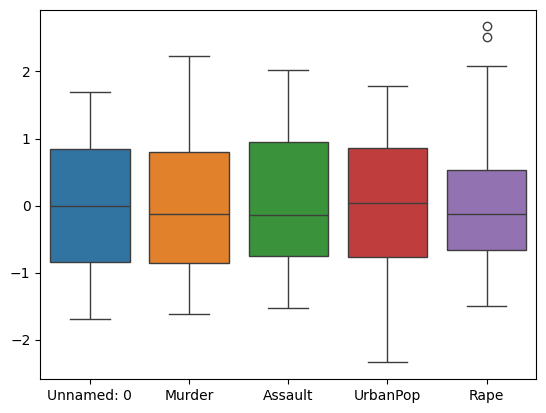

In [16]:
sns.boxplot(df_scaled)

As this is a clustering problem we will not divide the datset